In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), ".."))
sys.path

['/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/experiments',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python310.zip',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/lib-dynload',
 '',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages',
 '/home/grads/blessyantony/anaconda3/envs/zoonosis/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-linux-x86_64.egg',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/experiments/../../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/experiments/../..',
 '/home/grads/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/experiments/..']

In [2]:
from prediction.models.nlp import fnn, rnn, lstm, transformer

import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


### Model configs

In [3]:
fnn_model_config = {
    "name": "fnn",
    "depth": 2,
    "n_tokens": 27,
    "n_classes": 9,
    "input_dim": 512,
    "hidden_dim": 1024,
    "max_seq_len": 1115
}
 
rnn_model_config = {
    "name": "rnn",
    "depth": 2,
    "n_tokens": 27,
    "n_classes": 9,
    "input_dim": 512,
    "hidden_dim": 1024,
    "max_seq_len": 1115
}

lstm_model_config = {
    "name": "lstm",
    "depth": 2,
    "n_tokens": 27,
    "n_classes": 9,
    "input_dim": 512,
    "hidden_dim": 1024,
    "max_seq_len": 1115
}

transformer_model_config = {
    "name": "transformer",
    "with_convolution": False,
    "n_heads": 8,
    "depth": 6,
    "n_tokens": 27,
    "n_classes": 9,
    "input_dim": 512,
    "hidden_dim": 1024,
    "max_seq_len": 1115
}

transformer_cnv_model_config = {
    "name": "transformer",
    "with_convolution": False,
    "kernel_size": 4,
    "stride": 4,
    "n_heads": 8,
    "depth": 6,
    "n_tokens": 27,
    "n_classes": 9,
    "input_dim": 512,
    "hidden_dim": 1024,
    "max_seq_length": 1115
}

In [4]:
model_param_count_map = {}
def get_model_params_count(model_config):
    name = model_config["name"]
    if "fnn" in name:
        model = fnn.get_fnn_model(model_config)
    elif "rnn" in name:
        model = rnn.get_rnn_model(model_config)
    elif "lstm" in name:
        model = lstm.get_lstm_model(model_config)
    elif "transformer" in name:    
        model = transformer.get_transformer_model(model_config)
    else:
        print("ERROR: Model name not found.")
    
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return param_count


### FNN

In [5]:
n_layers = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]

for l in n_layers:
    fnn_model_config["depth"] = l
    model_param_count_map[f"fnn_l-{l}"] = get_model_params_count(fnn_model_config)

FNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (linear_ip): Linear(in_features=512, out_features=1024, bias=True)
  (linear_hidden): Linear(in_features=1024, out_features=1024, bias=True)
  (linear_hidden_n): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (linear_op): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  2647561
FNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (linear_ip): Linear(in_features=512, out_features=1024, bias=True)
  (linear_hidden): Linear(in_features=1024, out_features=1024, bias=True)
  (linear_hidden_n): ModuleList(
    (0-1): 2 x Linear(in_features=1024, out_features=1024, bias=True)
  )
  (linear_op): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  3697161
FNN_Model(
  (embedding): Embe

### RNN

In [6]:
n_layers = [1, 2, 3, 4, 5, 6, 7, 8]

for l in n_layers:
    rnn_model_config["depth"] = l
    model_param_count_map[f"rnn_l-{l}"] = get_model_params_count(rnn_model_config)

RNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (rnn): RNN(512, 1024, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  1597961
RNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (rnn): RNN(512, 1024, num_layers=2, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  3697161
RNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (rnn): RNN(512, 1024, num_layers=3, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  5796361
RNN_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (r

### LSTM

In [7]:
n_layers = [1, 2, 3, 4, 5, 6]

for l in n_layers:
    lstm_model_config["depth"] = l
    model_param_count_map[f"lstm_l-{l}"] = get_model_params_count(lstm_model_config)

LSTM_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (lstm): LSTM(512, 1024, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  6322697
LSTM_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (lstm): LSTM(512, 1024, num_layers=2, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  14719497
LSTM_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (lstm): LSTM(512, 1024, num_layers=3, batch_first=True)
  (linear): Linear(in_features=1024, out_features=9, bias=True)
)
Number of parameters =  23116297
LSTM_Model(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncodin

### Transformer

In [8]:
n_heads = [1, 2, 4, 6, 8]
n_layers = [1, 2, 3, 4, 5, 6]

for h in n_heads:
    for l in n_layers: 
        transformer_model_config["n_heads"] = h
        transformer_model_config["depth"] = l
        model_param_count_map[f"tf_h-{h}_l-{l}"] = get_model_params_count(transformer_model_config)

Transformer(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0): EncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=512, out_features=512, bias=True)
          (W_K): Linear(in_features=512, out_features=512, bias=True)
          (W_V): Linear(in_features=512, out_features=512, bias=True)
          (W_O): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward): FeedForwardLayer(
          (W_1): Linear(in_features=512, out_features=1024, bias=True)
          (W_2): Linear(in_features=1024, out_features=512, bias=True)
        )
        (residual_connections): ModuleList(
          (0-1): 2 x ResidualConnectionLayer(
            (norm): NormalizationLayer()
          )
        )
      )
    )
    (norm): NormalizationLayer()
  )
  (linear): Linear(in_features=512, out_features=9, bias=Tr

Transformer(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0-3): 4 x EncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=512, out_features=512, bias=True)
          (W_K): Linear(in_features=512, out_features=512, bias=True)
          (W_V): Linear(in_features=512, out_features=512, bias=True)
          (W_O): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward): FeedForwardLayer(
          (W_1): Linear(in_features=512, out_features=1024, bias=True)
          (W_2): Linear(in_features=1024, out_features=512, bias=True)
        )
        (residual_connections): ModuleList(
          (0-1): 2 x ResidualConnectionLayer(
            (norm): NormalizationLayer()
          )
        )
      )
    )
    (norm): NormalizationLayer()
  )
  (linear): Linear(in_features=512, out_features=9, b

Transformer(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=512, out_features=512, bias=True)
          (W_K): Linear(in_features=512, out_features=512, bias=True)
          (W_V): Linear(in_features=512, out_features=512, bias=True)
          (W_O): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward): FeedForwardLayer(
          (W_1): Linear(in_features=512, out_features=1024, bias=True)
          (W_2): Linear(in_features=1024, out_features=512, bias=True)
        )
        (residual_connections): ModuleList(
          (0-1): 2 x ResidualConnectionLayer(
            (norm): NormalizationLayer()
          )
        )
      )
    )
    (norm): NormalizationLayer()
  )
  (linear): Linear(in_features=512, out_features=9, b

Transformer(
  (embedding): EmbeddingLayer(
    (token_embedding): Embedding(27, 512)
    (positional_embedding): PositionalEncoding()
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0-4): 5 x EncoderLayer(
        (self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=512, out_features=512, bias=True)
          (W_K): Linear(in_features=512, out_features=512, bias=True)
          (W_V): Linear(in_features=512, out_features=512, bias=True)
          (W_O): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward): FeedForwardLayer(
          (W_1): Linear(in_features=512, out_features=1024, bias=True)
          (W_2): Linear(in_features=1024, out_features=512, bias=True)
        )
        (residual_connections): ModuleList(
          (0-1): 2 x ResidualConnectionLayer(
            (norm): NormalizationLayer()
          )
        )
      )
    )
    (norm): NormalizationLayer()
  )
  (linear): Linear(in_features=512, out_features=9, b

### Visualize the number of parameters

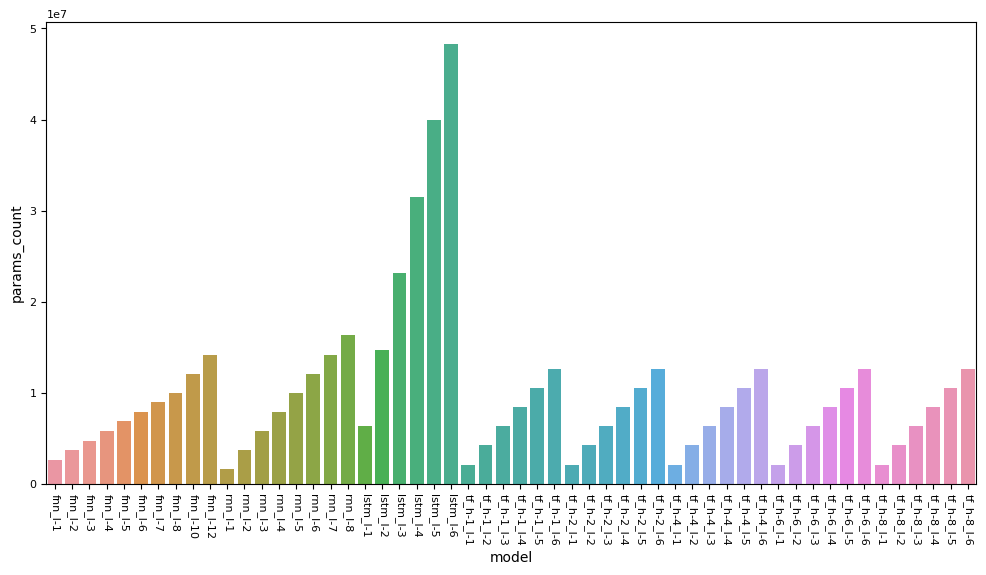

In [9]:
df = pd.DataFrame(model_param_count_map.items(), columns=["model", "params_count"])
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.figure(figsize=(12,6))
sns.barplot(df, x="model", y="params_count")
plt.xticks(rotation=-90)
plt.show()

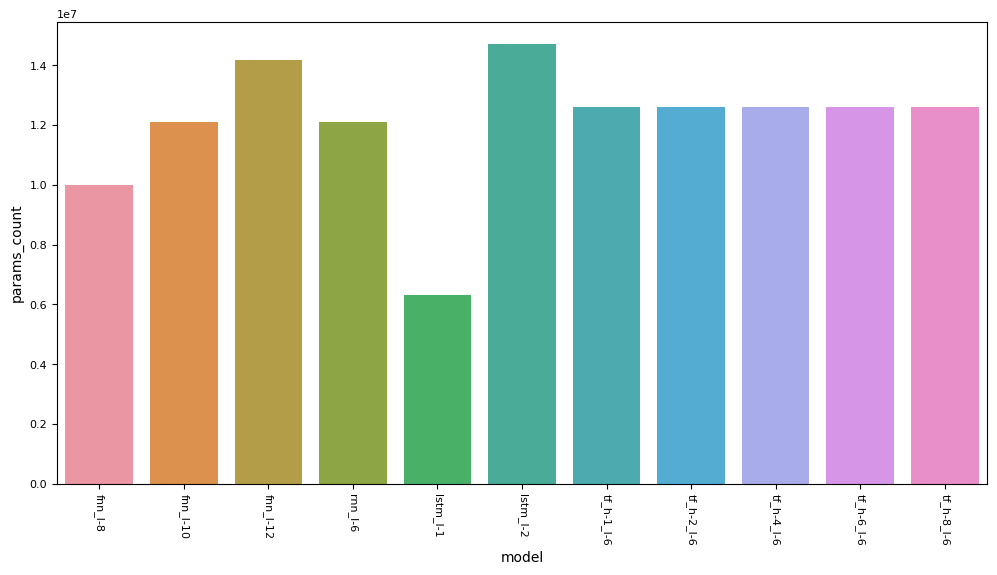

In [10]:
comparative_models = ["fnn_l-8", "fnn_l-10","fnn_l-12", "rnn_l-6", "lstm_l-1", "lstm_l-2", "tf_h-1_l-6", "tf_h-2_l-6", "tf_h-4_l-6", "tf_h-6_l-6", "tf_h-8_l-6"]
comparative_df = df[df["model"].isin(comparative_models)]
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.figure(figsize=(12,6))
sns.barplot(comparative_df, x="model", y="params_count", order=comparative_models)
plt.xticks(rotation=-90)
plt.show()

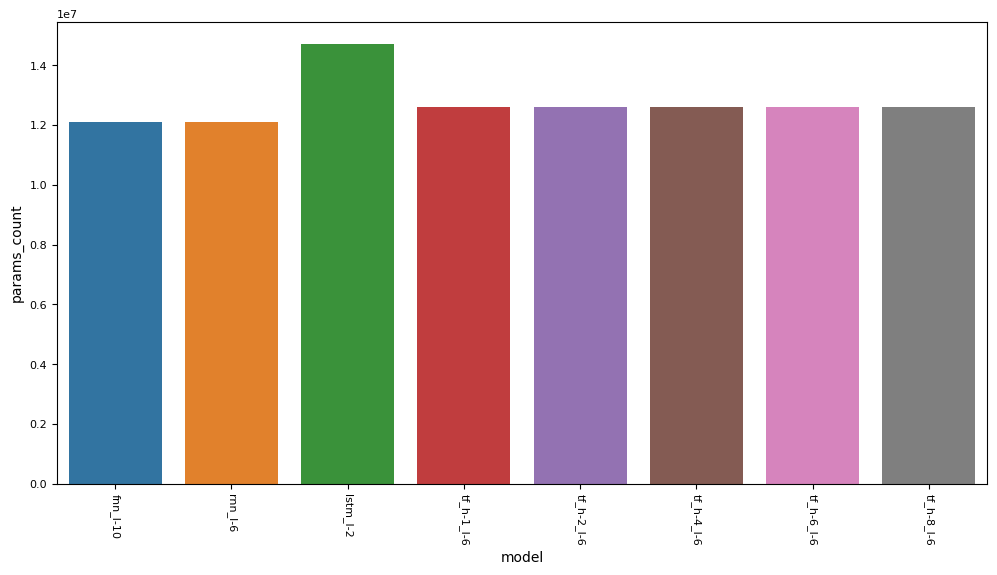

In [11]:
comparative_models = ["fnn_l-10", "rnn_l-6", "lstm_l-2", "tf_h-1_l-6", "tf_h-2_l-6", "tf_h-4_l-6", "tf_h-6_l-6", "tf_h-8_l-6"]
comparative_df = df[df["model"].isin(comparative_models)]
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.figure(figsize=(12,6))
sns.barplot(comparative_df, x="model", y="params_count", order=comparative_models)
plt.xticks(rotation=-90)
plt.show()